In [1]:
# Mall Customer segmentation using K-mean clustering

In [3]:
import pandas as pd
import numpy as np

In [6]:
from sklearn.preprocessing import StandardScaler

# Load dataset
df = pd.read_csv("D:\\Machine_Learning_Projects\\Grouping_customers\\Mall_Customers.csv")

# Drop unnecessary columns
df = df.drop(columns=['CustomerID'])

# Select relevant features
df_cluster = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Normalize data (Optional, improves K-Means performance)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cluster)

# Convert back to DataFrame for readability
df_cluster_scaled = pd.DataFrame(df_scaled, columns=['Annual Income (k$)', 'Spending Score (1-100)'])

# Display processed data
print(df_cluster_scaled.head())

   Annual Income (k$)  Spending Score (1-100)
0           -1.738999               -0.434801
1           -1.738999                1.195704
2           -1.700830               -1.715913
3           -1.700830                1.040418
4           -1.662660               -0.395980


C:\Users\Bhoomika NS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Bhoomika NS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Bhoomika NS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Bhoomika NS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have

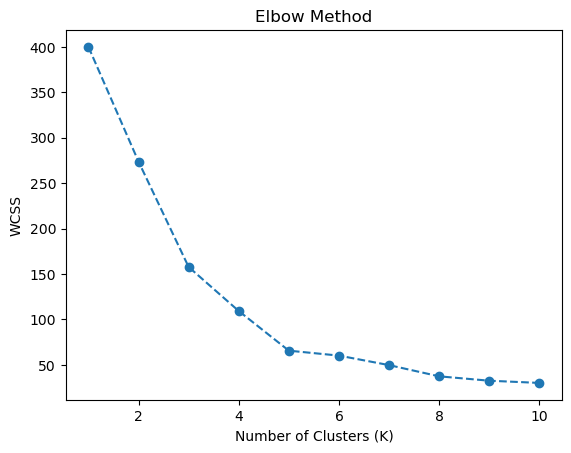

In [15]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []  # Within-cluster sum of squares
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# Plot Elbow Method graph
plt.plot(K_range, wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

In [22]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
df_cluster_scaled['Cluster'] = kmeans.fit_predict(df_scaled)

C:\Users\Bhoomika NS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


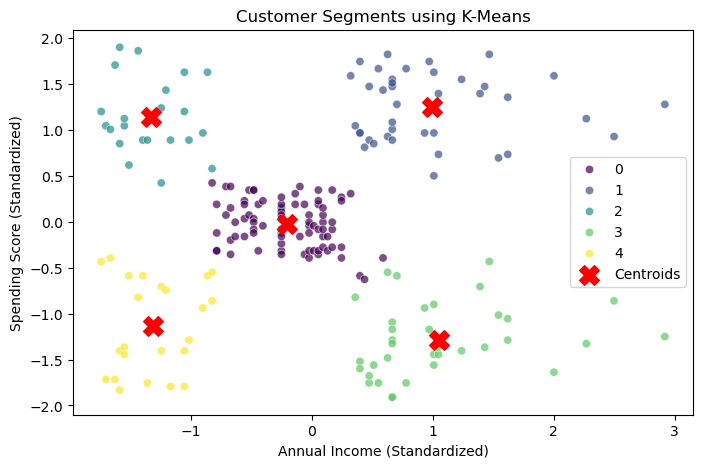

In [24]:
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.scatterplot(x=df_cluster_scaled['Annual Income (k$)'], 
                y=df_cluster_scaled['Spending Score (1-100)'], 
                hue=df_cluster_scaled['Cluster'], 
                palette='viridis', alpha=0.7)

# Plot centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')

plt.xlabel('Annual Income (Standardized)')
plt.ylabel('Spending Score (Standardized)')
plt.title('Customer Segments using K-Means')
plt.legend()
plt.show()

In [27]:
cluster_labels = {
    0: "Low Income, Low Spending",
    1: "Low Income, High Spending",
    2: "Middle Income, Moderate Spending",
    3: "High Income, Low Spending",
    4: "High Income, High Spending"
}

df_cluster_scaled['Cluster Label'] = df_cluster_scaled['Cluster'].map(cluster_labels)

In [29]:
df_cluster_scaled.to_csv("Clustered_Customers.csv", index=False)

In [30]:
df_cluster_scaled['Cluster Label'].value_counts()

Cluster Label
Low Income, Low Spending            81
Low Income, High Spending           39
High Income, Low Spending           35
High Income, High Spending          23
Middle Income, Moderate Spending    22
Name: count, dtype: int64